# Boundary value problems

---
Notes following [this book](https://websites.umich.edu/~mejn/cp/index.html).

Say we want to find the solution to a partial differential equation (PDE) given values at the boundary. One technique we can use is the finite differences method, which divides the region up into a grid of discrete points.

Suppose we want to find the electric potential $\phi$ within an empty square region that has one wall at voltage $V$ and the others at zero. 

We know that 

$$
\vec{E} = - \nabla \phi
$$

where $\vec{E}$, the electric field vector, is given by the negative gradient of the electric potential. By Gauss's Law, we also know that

$$
\nabla \cdot \vec{E} = \frac{\rho}{\epsilon_0}
$$

where $\epsilon_0$ is the permittivity of free space and $\rho$ is the electric charge density distribution. In our case, since the box is empty, it contains no charge. Thus

$$
\nabla \cdot \vec{E} = 0
$$

Then combining these equations, we get Laplace's equation

\begin{align*}
\nabla \phi &= -\vec{E} \\
\nabla \cdot \nabla \phi &= - \nabla \cdot \vec{E} \\
\nabla^2 \phi &= 0 \\
\end{align*}

In two dimensions, the Laplacian operator takes the form

$$
\nabla^2 = \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2}
$$

So that

$$
\nabla^2 \phi = \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = 0
$$

The goal is to solve for $\phi(x,y)$ within the box given that $\phi = V$ on the top edge, and $\phi = 0$ on the other three edges. 


Before solving the pde, we need to find a numerical way to approximate second partial derivatives. We can start out by finding the numerical approximation for a full derivative.

---

## Numerical differentiation interlude

### First derivatives 

The definition of the derivative for a function $f(x)$ with respect to $x$ is simply

$$
\frac{df}{dx} = \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h}
$$

The definition of a partial derivative for a function $f(x, y)$ with respect to $x$ is
$$
\frac{\partial f}{\partial x} = \lim_{h \rightarrow 0} \frac{f(x + h, y) - f(x, y)}{h}
$$

Given a small step $h$, the *forward difference* method for approximating a full derivative uses a point $x+h$ in front of $x$:
$$
\frac{df}{dx} \approx \frac{f(x + h) - f(x)}{h}
$$

We could instead look back a small amount $h$ from $x$, using the *backward difference* method:
$$
\frac{df}{dx} \approx \frac{f(x) - f(x - h)}{h}
$$

The *central difference* method improves upon the prior methods by looking forward and backward a small amount $\frac{h}{2}$ symmetrically around $x$:
$$ 
\frac{df}{dx} \approx \frac{f(x + \frac{h}{2}) - f(x - \frac{h}{2})}{h}
$$

### Second derivatives

By taking the derivative of a first derivative, we get a second derivative. We can numerically approximate a second derivative using the *central difference* method. 

Let's first consider the *central difference* derivative at a point $x + \frac{h}{2}$:

$$ 
f'(x + h/2) \approx \frac{f(x + \frac{h}{2} + \frac{h}{2}) - f(x + \frac{h}{2} - \frac{h}{2})}{h} = \frac{f(x + h) - f(x)}{h}
$$

And next at a point $x - \frac{h}{2}$:

$$ 
f'(x - h/2) \approx \frac{f(x - \frac{h}{2} + \frac{h}{2}) - f(x - \frac{h}{2} - \frac{h}{2})}{h} = \frac{f(x) - f(x - h)}{h}
$$

We see that we have sort of recovered the forward and backward difference derivatives.

This is great! Recall that we originally formulated the *central difference* approximation of the first derivative using $f(x \pm \frac{h}{2})$. Now that we have expressions for $f'(x \pm \frac{h}{2})$, we can similarly approximate the second derivative using the *central difference* method:

$$ 
f''(x) \approx \frac{f'(x + \frac{h}{2}) - f'(x - \frac{h}{2})}{h} = \frac{\frac{f(x + h) - f(x)}{h} - \frac{f(x) - f(x - h)}{h}}{h} = \frac{f(x + h) - 2f(x) + f(x - h)}{h^2}
$$

We can similarly write down the second partial derivative of $f(x, y)$ with respect to $x$ as

$$ 
\frac{\partial^2 f}{\partial x^2} \approx  \frac{f(x + h) - 2f(x) + f(x - h)}{h^2} = \frac{f(x + h) + f(x - h) - 2f(x)}{h^2}
$$

The proof is left as an exercise to the reader :)

---
## The method of relaxation (Jacobi method)

Returning to our original problem, we want to solve for $\phi(x,y)$ within the box given that $\phi = V$ on the top edge, and $\phi = 0$ on the other three edges. 

Let's set up a grid of points within the box, including the boundary, a distance $a$ apart (L1 distance). Recall that we applied the Laplacian operator to $\phi$ to find how the electric potential is characterized within the box
$$
\nabla^2 \phi = \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = 0
$$

Using what we learned above about second derivatives, we can write down the partial derivatives with respect to $x$ and $y$, respectively, as
$$ 
\frac{\partial^2 \phi}{\partial x^2} \approx  \frac{\phi(x + a, y)  + \phi(x - a, y) - 2\phi(x, y)}{a^2}
$$
$$ 
\frac{\partial^2 \phi}{\partial y^2} \approx  \frac{\phi(x, y+a)  + \phi(x, y-a) - 2\phi(x, y)}{a^2}
$$

Plugging these into Laplace's equation, we get

$$
\frac{\phi(x + a, y)  + \phi(x - a, y) - 2\phi(x, y)}{a^2} + \frac{\phi(x, y+a)  + \phi(x, y-a) - 2\phi(x, y)}{a^2}  = 0
$$

Which can be rearranged to get our solution for $\phi$

$$
\boxed{\phi(x, y) = \frac{1}{4} \left[\phi(x + a, y)  + \phi(x - a, y) + \phi(x, y+a)  + \phi(x, y-a)\right]}
$$

Interestingly, we see that the solution at $(x, y)$ is the average of the values on the immediately adjacent points of the grid.

This suggests a technique for numerically solving for $\phi$
1) Fix the known boundary conditions on $\phi$
2) Guess some initial values for the rest of $\phi(x, y)$ (we'll just use zero)
3) Assign each point in the grid a new value according to our averaging solution for $\phi(x, y)$ to grid $\phi'(x, y)$
4) Repeat step 3 until convergence, when $ \Delta \phi(x, y) = \phi'(x, y) - \phi(x, y)$ is smaller than our allowed error

Suppose that we have a 100 x 100 grid with $V = 1$, then

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 100          # number of grid points on a side
V = 1.0          # voltage at top wall
target = 1e-6    # stopping criterion

# phi(x, y) grid -- N+1 x N+1 to include the boundary edges as well
phi = np.zeros([N+1,N+1],float)

# set the top edge to V
phi[0,:] = V

In [3]:
def relaxation_slow(phi: np.ndarray, target: float) -> np.ndarray:
    """Relaxation function as described in the book... very slow!"""
    N = phi.shape[0] - 1
    delta = float("inf") 

    # create a copy of phi to hold the updated values
    phi_prime = phi.copy()
    
    while delta > target:
        # only iterate over the interior points -- the boundary values are fixed
        for i in range(1, N):
            for j in range(1, N):
                
                # update the value of phi_prime at each point using the old values of phi
                phi_prime[i,j] = 0.25 * (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])
                
        # get the maximum difference between phi and phi_prime
        delta = np.max(np.abs(phi_prime - phi))
        
        # swap the values of phi and phi_prime
        phi, phi_prime = phi_prime, phi
    return phi


def relaxation(phi: np.ndarray, target: float, num_iters: int = 100_000) -> np.ndarray:
    """Vectorized relaxation function... much faster!"""
    N = phi.shape[0] - 1

    # make a copy of phi to compare the new values
    phi_prime = phi.copy()

    # count the total number of iterations
    total_iters = 0
    convergence_reached = False
    for _ in range(num_iters):
        # update all interior points at once using slicing
        phi_prime[1:N, 1:N] = 0.25 * (phi[0:N-1, 1:N] + phi[2:N+1, 1:N] + phi[1:N, 0:N-1] + phi[1:N, 2:N+1])

        # get the maximum difference between phi and phi_prime
        delta = np.max(np.abs(phi - phi_prime))
        phi, phi_prime = phi_prime, phi

        # check stopping criterion
        if delta < target:
            print(f"Convergence reached after {total_iters+1} iterations.")
            convergence_reached = True
            break
        total_iters += 1

    if not convergence_reached:
        print(f"Convergence not reached after {num_iters} iterations.")
    return phi

The algorithm converged to a solution after 10736 iterations. We see that the potential at the top of the box is near one, and that the potential near the other walls is zero, as expected.

Convergence reached after 10736 iterations.


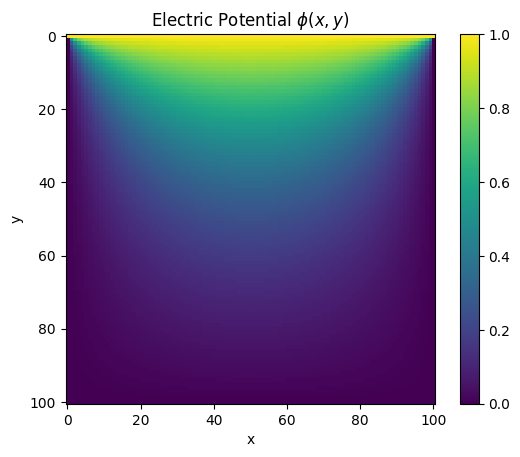

In [4]:
phi_solution = relaxation(phi, target)
plt.imshow(phi_solution, cmap="viridis")
plt.colorbar()
plt.title(r"Electric Potential $\phi(x, y)$")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

---

## Overrelaxation and the Gauss-Seidel method

The method of relaxation is numerically stable, so it will eventually converge. During each iteration, the values at each point move closer to their optimal value. To speed up the process, we can simply increase the size of each update by some amount each step.

Suppose we have our set of values $\phi(x, y)$ on the grid points and at the next iteration we have a new set $\phi'(x, y)$. Then the new set can be written as

$$
\phi'(x, y) = \phi(x, y) + \Delta \phi(x, y)
$$

where $\Delta \phi(x, y)$ is the change in $\phi$ on this step, given by $\phi'(x, y) - \phi(x, y)$. We can define the overrelaxed values $\phi_\omega(x, y)$ as

$$
\phi_\omega(x, y) = \phi(x, y) + (1 + \omega)\Delta \phi(x, y)
$$

where $0 < \omega < 1$. Substituting in $\Delta \phi(x, y) = \phi'(x, y) - \phi(x, y)$, 

\begin{align*}
\phi_\omega(x, y) &= \phi(x, y) + (1 + \omega)\Delta \phi(x, y) \\
&= \phi(x, y) + (1 + \omega)[\phi'(x, y) - \phi(x, y)] \\
&= (1 + \omega)\phi'(x, y) - \omega \phi(x, y) \\
&= (1 + \omega)\frac{1}{4} \left[\phi(x + a, y)  + \phi(x - a, y) + \phi(x, y+a)  + \phi(x, y-a)\right] - \omega \phi(x, y) \\
\end{align*}



We can speed up the process even more using the Gauss-Seidel method. The idea behind it is simple: if the updated values $\phi'(x, t)$ are better than the current assignments $\phi(x, y)$, then why do we use the old values during value updates? Currently, we iterate over each point in the grid, and assign point $(x, y)$ the value $\phi'(x, y)$, which is the average of the surrounding $\phi(x, y)$ values. We should be using updated $\phi'(x, y)$ values if they are available.

The simplest way to implement this is with a single array of values. We previously iterated over the old grid, found the updated value for each cell using the old values, and stored these values in a new grid. Instead, we can do everything in place. We can iterate over our grid, find the updated cell values, and replace the old values as we go. This way we always use updated values when possible.

Combining this with our method of overrelaxation, we can ditch the prime notation and write

$$
\boxed{\phi(x, y) \leftarrow \frac{1 + \omega}{4} \left[\phi(x + a, y)  + \phi(x - a, y) + \phi(x, y+a)  + \phi(x, y-a)\right] - \omega \phi(x, y)}
$$

When $\omega = 0$, we recover the previous solution.

In [5]:
N = 100          # number of grid points on a side
V = 1.0          # voltage at top wall
target = 1e-6    # target accuracy
omega = 0.9      # overrelaxation parameter

# phi(x, y) grid -- N+1 x N+1 to include the boundary edges as well
phi = np.zeros([N+1,N+1],float)

# set the top edge to V
phi[0,:] = V

In [6]:
def gauss_seidel_slow(phi: np.ndarray, target: float, omega: float, num_iters: int = 100_000) -> np.ndarray:
    """Gauss-Seidel relaxation function as described in the book... quickish"""
    N = phi.shape[0] - 1

    # count the total number of iterations
    total_iters = 0
    convergence_reached = False
    for _ in range(num_iters):
        # store the maximum change in phi
        delta = 0.0
        # only iterate over the interior points -- the boundary values are fixed
        for i in range(1, N):
            for j in range(1, N):
                # store the old value of phi at this point
                old_phi = phi[i,j]
                
                # update the value of phi in place
                phi[i,j] = (1 + omega) * 0.25 * (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1]) - omega * phi[i,j]
                
                # store the maximum change in phi
                delta = max(delta, abs(phi[i,j] - old_phi))

        # check stopping criterion
        if delta < target:
            print(f"Convergence reached after {total_iters+1} iterations.")
            convergence_reached = True
            break
        total_iters += 1

    if not convergence_reached:
        print(f"Convergence not reached after {num_iters} iterations.")
    return phi


def gauss_seidel(phi: np.ndarray, target: float, omega: float, num_iters: int = 100_000) -> np.ndarray:
    """Vectorized Gauss-Seidel relaxation function... much faster!"""
    N = phi.shape[0] - 1

    # count the total number of iterations
    total_iters = 0
    convergence_reached = False
    for _ in range(num_iters):
        # make a copy of phi to compare the new values
        phi_old = phi.copy()

        # update all interior points at once using slicing
        phi[1:N, 1:N] = (1+ omega) * 0.25 * (phi[0:N-1, 1:N] + phi[2:N+1, 1:N] + phi[1:N, 0:N-1] + phi[1:N, 2:N+1]) - omega * phi[1:N, 1:N]
        
        # get the maximum difference old and new phi values
        delta = np.max(np.abs(phi - phi_old))

        if delta < target:
            print(f"Convergence reached after {total_iters+1} iterations.")
            convergence_reached = True
            break
        total_iters += 1

    if not convergence_reached:
        print(f"Convergence not reached after {num_iters} iterations.")
        
    return phi

The unoptimized algorithm converged after 423 iterations

Convergence reached after 423 iterations.


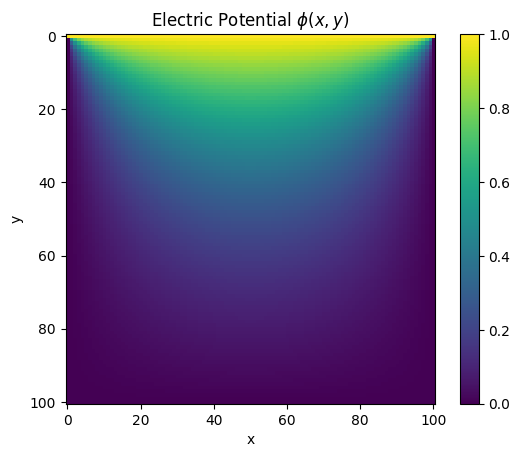

In [7]:
phi_solution = gauss_seidel_slow(phi, target, omega)
plt.imshow(phi_solution, cmap="viridis")
plt.colorbar()
plt.title(r"Electric Potential $\phi(x, y)$")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

The optimized algorithm immediately converged.

Convergence reached after 1 iterations.


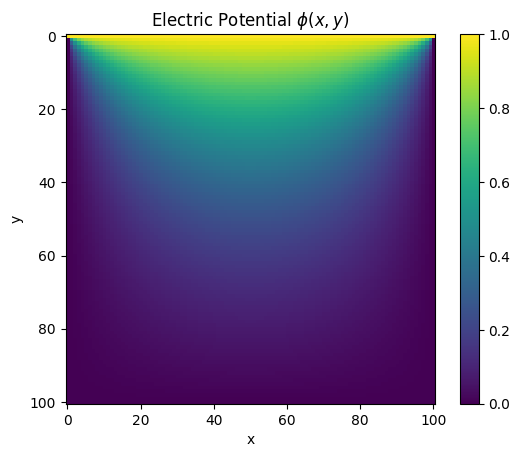

In [8]:
phi_solution = gauss_seidel(phi, target, omega)
plt.imshow(phi_solution, cmap="viridis")
plt.colorbar()
plt.title(r"Electric Potential $\phi(x, y)$")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

---

# Poisson equation

So far, we have assumed that there is no charge within the box, giving us a simple equation

$$
\nabla^2 \phi  = 0
$$

Now let's assume that there is a non-zero charge density $\rho$. Thus we have

\begin{align*}
\nabla \phi &= -\vec{E} \\
\nabla \cdot \nabla \phi &= - \nabla \cdot \vec{E} \\
\nabla^2 \phi &= - \frac{\rho}{\epsilon_0} \\
\end{align*}

This solution to the Poisson equation governs the electric potential in the presence of a non-zero $\rho$. Writing out the Laplacian operator, 
$$
\nabla^2 \phi = \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = - \frac{\rho}{\epsilon_0} \\
$$

and substituting in the partial derivatives,
$$
\frac{\phi(x + a, y)  + \phi(x - a, y) - 2\phi(x, y)}{a^2} + \frac{\phi(x, y+a)  + \phi(x, y-a) - 2\phi(x, y)}{a^2} = - \frac{\rho(x, y)}{\epsilon_0} \\
$$

we can rearrange to find

$$
\boxed{\phi(x, y) = \frac{1}{4} \left[\phi(x + a, y)  + \phi(x - a, y) + \phi(x, y+a)  + \phi(x, y-a)\right] + \frac{a^2}{4 \epsilon_0}\rho(x, y)}
$$


Suppose we have a positive and negative charged region within the box, and that the potential on all of the walls is zero.

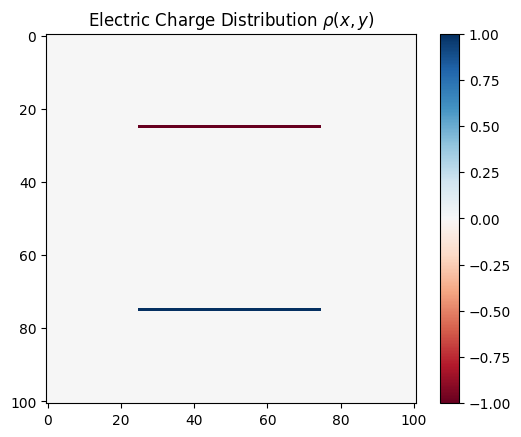

In [9]:
N = 100          # number of grid points on a side
V = 1.0          # voltage at top wall
target = 1e-6    # target accuracy
omega = 0.9      # overrelaxation parameter

# phi(x, y) grid -- N+1 x N+1 to include the boundary edges as well
phi = np.zeros([N+1,N+1],float)

# set the positive charge 
phi[int(3*N/4), int(N/4):int(3*N/4)] = 1.0

# set the negative charge
phi[int(N/4), int(N/4):int(3*N/4)] = -1.0

plt.imshow(phi, cmap="RdBu")
plt.title(r"Electric Charge Distribution $\rho(x, y)$")
plt.colorbar()
plt.show()

In [10]:
def relaxation(phi: np.ndarray, target: float, num_iters: int = 100) -> np.ndarray:
    """Vectorized relaxation function... much faster!"""
    N = phi.shape[0] - 1

    # make a copy of phi to compare the new values
    phi_prime = phi.copy()
    
    for i in range(num_iters):
        # update all interior points at once using slicing
        phi_prime[1:N, 1:N] = 0.25 * (phi[0:N-1, 1:N] + phi[2:N+1, 1:N] + phi[1:N, 0:N-1] + phi[1:N, 2:N+1])

        # get the maximum difference between phi and phi_prime
        delta = np.max(np.abs(phi - phi_prime))
        phi, phi_prime = phi_prime, phi

        if delta < target:
            print(f"Convergence reached after {i+1} iterations.")
            break

    return phi

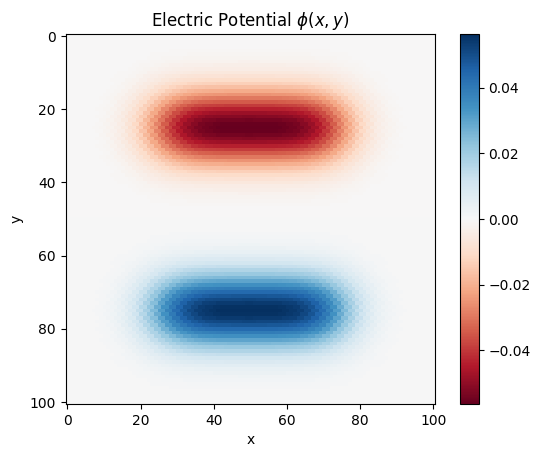

In [11]:
phi_solution = relaxation(phi, target)
plt.imshow(phi_solution, cmap="RdBu")
plt.colorbar()
plt.title(r"Electric Potential $\phi(x, y)$")
plt.xlabel("x")
plt.ylabel("y")
plt.show()